In [1]:
import mysqlpi
import numpy as np
from mysqlpi import get_control_data, get_dynamics_data

# column_name = mysqlpi.get_control_data_name()
# for i in range(len(column_name)):
#     print(i, column_name[i])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

total_cnt = get_control_data('att_mandate_att_total_cnt')
time_lime = total_cnt * 0.25

# 姿态角分析

# 角速度分析

In [3]:
omega_BI_B_meas = get_control_data('\
vGyro_omega_BI_B_data_x, \
vGyro_omega_BI_B_data_y, \
vGyro_omega_BI_B_data_z')
omega_BI_B_true = get_dynamics_data('\
real_out_omega_b_x, \
real_out_omega_b_y, \
real_out_omega_b_z')
omega_BI_B_target = get_control_data('\
Sat_target_omega_TI_T_data_x, \
Sat_target_omega_TI_T_data_y, \
Sat_target_omega_TI_T_data_z')

## 角速度测量精度

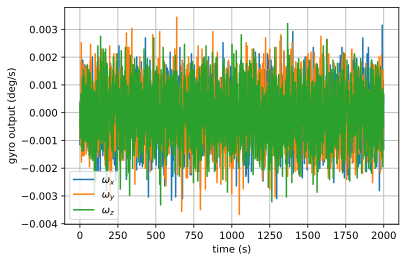

In [9]:
fig, ax = plt.subplots()
lines = ax.plot(time_lime, np.rad2deg(omega_BI_B_meas - omega_BI_B_true))
ax.set_xlabel('time (s)')
ax.set_ylabel('gyro output (deg/s)')
ax.legend(lines, ['$\omega_x$','$\omega_y$','$\omega_z$'])
ax.grid()
fig.show()

## 角速度控制精度（稳定性）

3


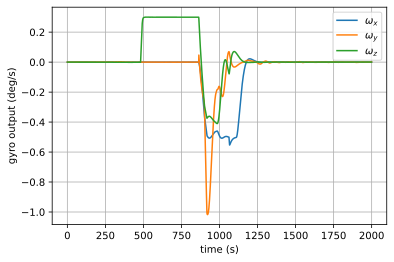

In [14]:
fig, ax = plt.subplots()
lines = ax.plot(time_lime, np.rad2deg(omega_BI_B_true-omega_BI_B_target))
ax.set_xlabel('time (s)')
ax.set_ylabel('gyro output (deg/s)')
ax.legend(lines, ['$\omega_x$','$\omega_y$','$\omega_z$'])
ax.grid()
fig.show()

In [6]:
fig.savefig('result.jpg', dpi=150)